# Diamonds Project
####  Alina Eliovich 205947443,  Hadas Foox 205651060

# Introduction

In our project we will try to analyze features that affect the price of diamond. We took our dataset from Kaggle that has 11 columns. 
The columns: 
*	price - price in US dollars ($326--$18,823)
*	carat - weight of the diamond (0.2--5.01)
*	cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
*	diamond color, from J (worst) to D (best)
*	clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
*	x length in mm (0--10.74)
*	y width in mm (0--58.9)
*	z depth in mm (0--31.8)
*	depth total depth percentage = z / mean (x, y) = 2 * z / (x + y) (43--79)
*	table width of top of diamond relative to widest point (43--95)

# Load libraries

In [101]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Experiments

### Describe data set:

In [102]:
diamond_data = pd.read_csv("diamonds.csv")

In [103]:
diamond_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Droping the first column which is simply the index for the dataset:

In [104]:
diamond_data = diamond_data.drop(["Unnamed: 0"],axis=1)

In [105]:
diamond_data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


According to desribe function, Columns x (length), y (width), z (height) have some zero values. 0 values for length, width or depth does not make sense, hence we remove all such rows:

In [106]:
diamond_data= diamond_data.drop(diamond_data.loc[diamond_data.x <= 0].index)
diamond_data = diamond_data.drop(diamond_data.loc[diamond_data.y <= 0].index)
diamond_data = diamond_data.drop(diamond_data.loc[diamond_data.z <= 0].index)

* Checking for missing data:

In [107]:
diamond_data.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

Lucklly there is no missing Data

# Visualization of Data
We visualize data to uncover hidden patterns if any in the dataset

In order to start visualize our data and normallize for data minding, we make a copy of our dataset for our convenience:

In [108]:
diamond=diamond_data.copy()

We add a simple feature which is ratio of length, width and depth. This feature is important because it determines the shape and size of the diamond which in turn has affect in determining the price of diamond.

In [109]:
diamond["ratio"] = diamond.x*diamond.y*diamond.z

### Feature Encoding

Feature Encoding is an important because We have to encode the values such that better feature value has higher value as Was mentioned in the first paragraph.
This is important because these values will play important part in regression as the classifier would consider larger value having more impact on the final price as compared to a smaller value.

In [110]:
diamond_cut = {'Fair':0,
               'Good':1,
               'Very Good':2, 
               'Premium':3,
               'Ideal':4}

diamond_color = {'J':0,
                 'I':1, 
                 'H':2,
                 'G':3,
                 'F':4,
                 'E':5,
                 'D':6}

diamond_clarity = {'I1':0,
                   'SI2':1,
                   'SI1':2,
                   'VS2':3,
                   'VS1':4,
                   'VVS2':5,
                   'VVS1':6,
                   'IF':7}

diamond.cut = diamond.cut.map(diamond_cut);
diamond.clarity = diamond.clarity.map(diamond_clarity);
diamond.color = diamond.color.map(diamond_color);

In [111]:
diamond.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,ratio
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [112]:
diamond.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z,ratio
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,2.904228,3.405972,3.051502,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046,129.897567
std,0.473795,1.116579,1.701272,1.647005,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530,78.219789
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,31.707984
25%,0.400000,2.000000,2.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,65.189759
50%,0.700000,3.000000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,114.840180
75%,1.040000,4.000000,5.000000,4.000000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000,170.846415
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,3840.598060


* we can see that there is a high contrast between a large quantity of diamonds at a high cutting level (4 out of 4) and a high quality of color (5 out of 6), compared to most of the low carat weights (1 out of 5), so we will have to plan well how we will analyze the factors that affect prices The diamond.

## Evaluation metrics:

Text(0.5,1,'Carat Weight and price matrix')

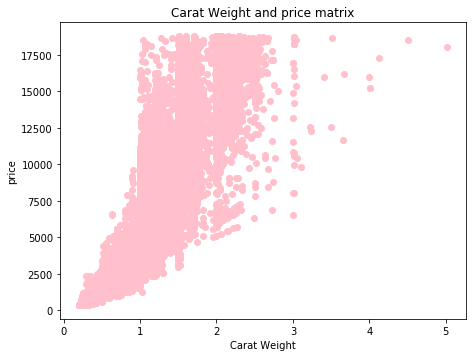

In [113]:
plt.figure(figsize=[16,12])
plt.subplot(221)
plt.scatter(diamond['carat'],diamond['price'],label='Carat Weight',color='pink')
plt.xlabel('Carat Weight')
plt.ylabel('price')
plt.title('Carat Weight and price matrix')

* we can see as expected, that as the carat weight is higher the price is higher too.

Text(0.5,1,'Distribution of Diamond carat and ratio')

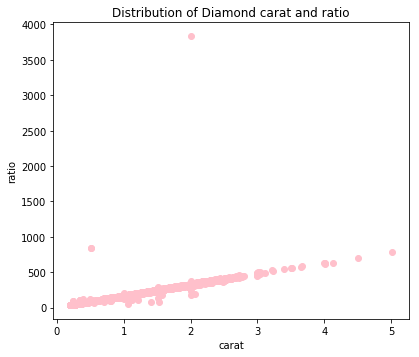

In [114]:
plt.figure(figsize=[14,12])
plt.subplot(222)
plt.scatter(diamond['carat'],diamond['ratio'],label='carat and ratio',color='pink')
plt.title('Carat Weight and price matrix')
plt.xlabel('carat')
plt.ylabel('ratio')
plt.title('Distribution of Diamond carat and ratio')

* we can see that there is noise in the data and therefore normalize it:

In [115]:
diamond=diamond.loc[diamond['ratio'] < 2000]

Text(0.5,1,'Distribution of Diamond carat and ratio')

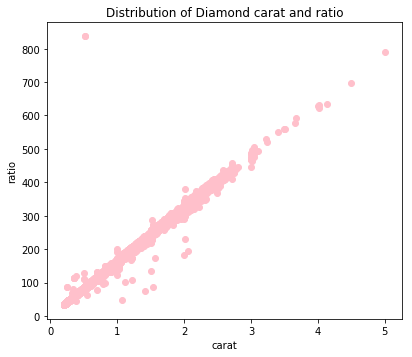

In [116]:
plt.figure(figsize=[14,12])
plt.subplot(222)
plt.scatter(diamond['carat'],diamond['ratio'],label='carat and ratio',color='pink')
plt.title('Carat Weight and price matrix')
plt.xlabel('carat')
plt.ylabel('ratio')
plt.title('Distribution of Diamond carat and ratio')

Now we can see clearly that there is a direct correlation between the carat weight and the ratio.

Text(0,0.5,'price')

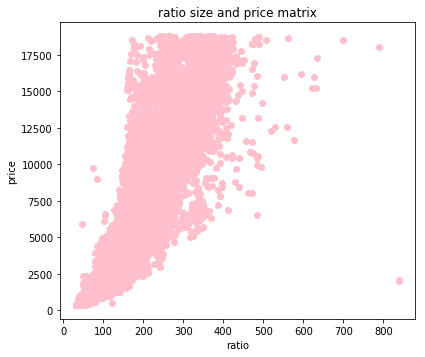

In [117]:
plt.figure(figsize=[14,12])
plt.subplot(222)
plt.scatter(diamond['ratio'],diamond['price'],label='carat and ratio',color='pink')
plt.title('ratio size and price matrix')
plt.xlabel('ratio')
plt.ylabel('price')

###### Here we can see clearly that the size of the diamond affects its price

* Now we would like to examine the additional factors affecting the price apart from the size and weigt of the diamond. So we will examine the effect of the clarity, color and cut elements:


Text(0,0.5,'price')

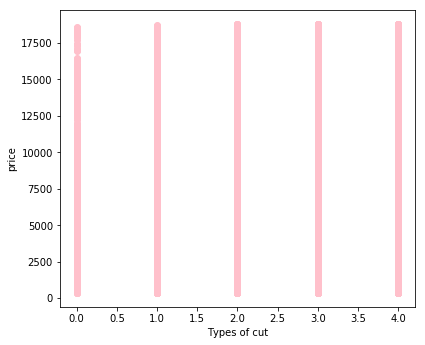

In [118]:
plt.figure(figsize=[14,12])
plt.subplot(223)
plt.scatter(diamond['cut'],diamond['price'],label='cut',color='pink')
plt.xlabel('Types of cut')
plt.ylabel('price')

Text(0,0.5,'price')

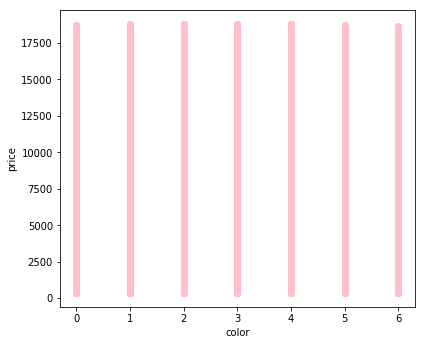

In [119]:
plt.figure(figsize=[14,12])
plt.subplot(223)
plt.scatter(diamond['color'],diamond['price'],label='color',color='pink')
plt.xlabel('color')
plt.ylabel('price')

Text(0,0.5,'price')

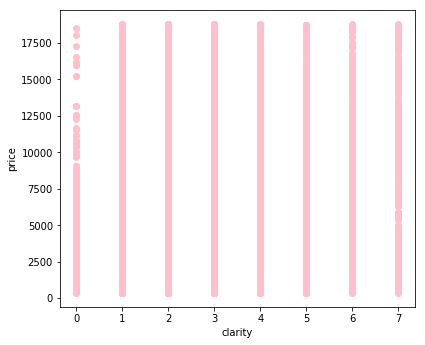

In [120]:
plt.figure(figsize=[14,12])
plt.subplot(223)
plt.scatter(diamond['clarity'],diamond['price'],label='cut',color='pink')
plt.xlabel('clarity')
plt.ylabel('price')

#### we can see that even the lowest diamonds quality, can get to the highest prices. So we decided to try and examine the diamonds with simillar size only.

Text(0.5,1,'ratio size and amount')

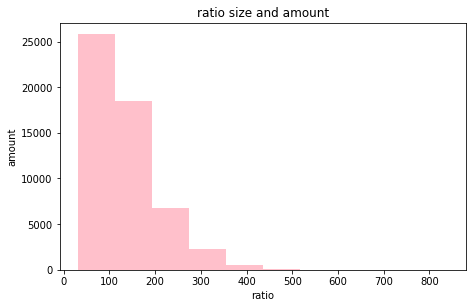

In [121]:
plt.figure(figsize=[16,10])
plt.subplot(221)
plt.hist(diamond['ratio'],color='pink')
plt.xlabel('ratio')
plt.ylabel('amount')
plt.title('ratio size and amount')

we can see that in our dataset, There is a majority of small diamonds. 
Therefore, this group is chosen for the group to be examined.

In [122]:
small_diamonds=diamond.loc[diamond['ratio'] < 100]
#small_diamonds

Text(0,0.5,'price')

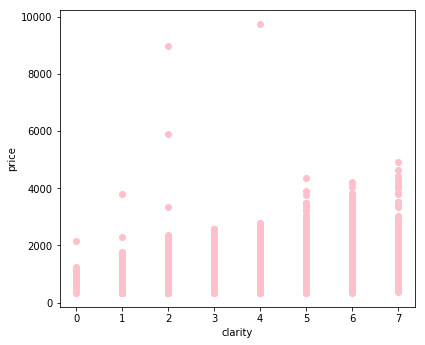

In [123]:
plt.figure(figsize=[14,12])
plt.subplot(223)
plt.scatter(small_diamonds['clarity'],small_diamonds['price'],label='cut',color='pink')
plt.xlabel('clarity')
plt.ylabel('price')

Text(0,0.5,'price')

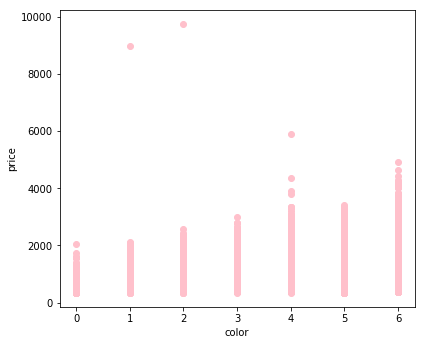

In [124]:
plt.figure(figsize=[14,12])
plt.subplot(223)
plt.scatter(small_diamonds['color'],small_diamonds['price'],label='cut',color='pink')
plt.xlabel('color')
plt.ylabel('price')


Text(0,0.5,'price')

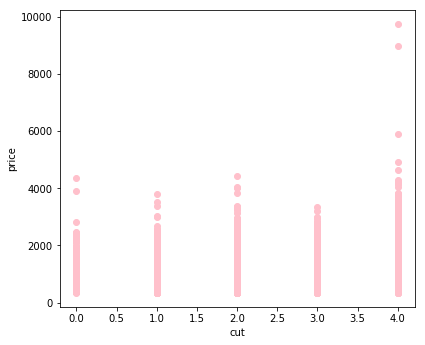

In [125]:
plt.figure(figsize=[14,12])
plt.subplot(223)
plt.scatter(small_diamonds['cut'],small_diamonds['price'],label='cut',color='pink')
plt.xlabel('cut')
plt.ylabel('price')

When we look at the quality of diamond clarity and color, relative to the small size diamond group, we can see that there is a correlation between the quality of the features and the price.
In addition, it can be seen that color is the most influential factor on the price of the three quality features.

Surprisingly, the cut feature seems to have no direct impact on the diamond's price. Therefore we will try to examine the effect of each of the feature on the price when the other two factors are the highest when we are still in the small diamond group.

In [126]:
# Clarity effect:
diamondsClarity=small_diamonds.loc[diamond['cut'] > 3]
diamondsClarity=diamondsClarity.loc[diamond['color'] > 5]
#diamondsT=diamondsT.loc[diamond['clarity'] > 6]

Text(0,0.5,'price')

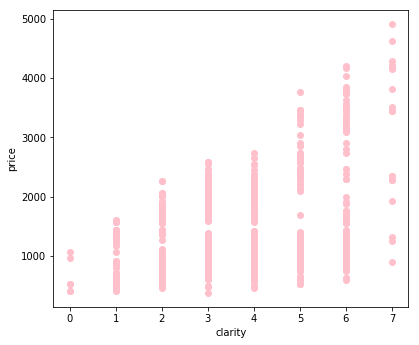

In [127]:
plt.figure(figsize=[14,12])
plt.subplot(223)
plt.scatter(diamondsClarity['clarity'],diamondsClarity['price'],label='cut',color='pink')
plt.xlabel('clarity')
plt.ylabel('price')

In [128]:
# Color effect:
diamondsColor=small_diamonds.loc[diamond['cut'] > 3]
#diamondsT=diamondsT.loc[diamond['color'] > 5]
diamondsColor=diamondsColor.loc[diamond['clarity'] > 6]

Text(0,0.5,'price')

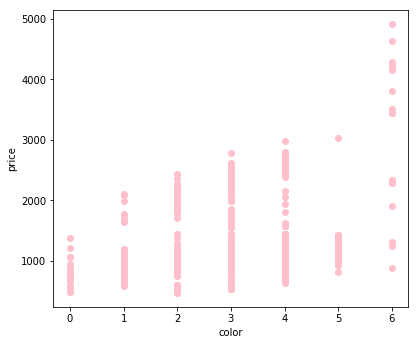

In [129]:
plt.figure(figsize=[14,12])
plt.subplot(223)
plt.scatter(diamondsColor['color'],diamondsColor['price'],label='cut',color='pink')
plt.xlabel('color')
plt.ylabel('price')

In [130]:
# Cut effect:
#diamondsColor=small_diamonds.loc[diamond['cut'] > 3]
diamondsCut=small_diamonds.loc[diamond['color'] > 5]
diamondsCut=diamondsCut.loc[diamond['clarity'] > 6]

Text(0,0.5,'price')

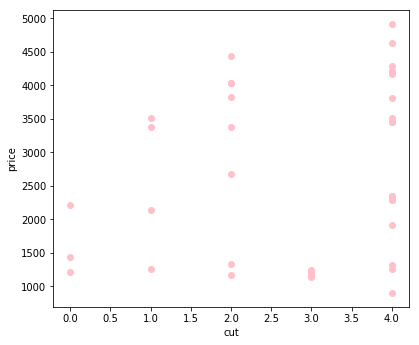

In [131]:
plt.figure(figsize=[14,12])
plt.subplot(223)
plt.scatter(diamondsCut['cut'],diamondsCut['price'],label='cut',color='pink')
plt.xlabel('cut')
plt.ylabel('price')

We can see the effect of color and clarity on the price of the diamond in a more significant way, and also that even cutting has a weaker effect.

Now we want to check the reation between color and clarity:

Text(0,0.5,'clarity')

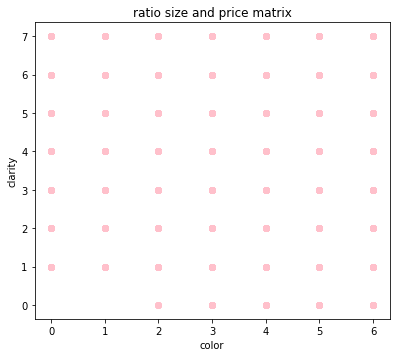

In [132]:
plt.figure(figsize=[14,12])
plt.subplot(222)
plt.scatter(small_diamonds['color'],small_diamonds['clarity'],label='carat and ratio',color='pink')
plt.title('ratio size and price matrix')
plt.xlabel('color')
plt.ylabel('clarity')

You can see that there is no relationship between the color of the diamond and its clarity.
The factors affect the price, but in fact each type of clarity of a diamond can be any color and vice versa.

In [133]:
big_diamonds=diamond.loc[diamond['ratio'] > 200]

Text(0.5,1,'Price of big diamonds distribution')

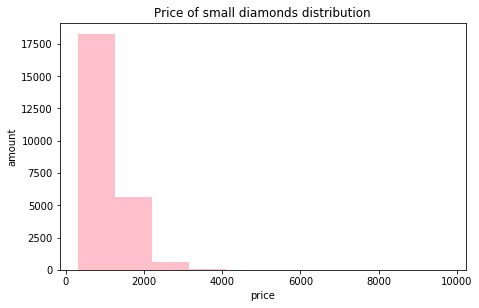

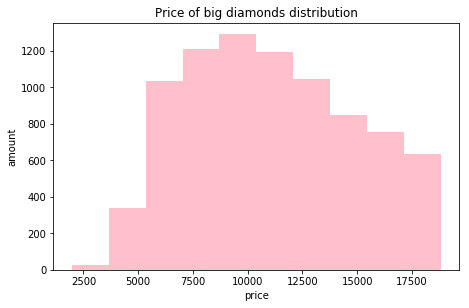

In [134]:
plt.figure(figsize=[16,10])
plt.subplot(221)
plt.hist(small_diamonds['price'],color='pink')
plt.xlabel('price')
plt.ylabel('amount')
plt.title('Price of small diamonds distribution')

plt.figure(figsize=[16,10])
plt.subplot(221)
plt.hist(big_diamonds['price'],color='pink')
plt.xlabel('price')
plt.ylabel('amount')
plt.title('Price of big diamonds distribution')

It can be seen that in the large diamond environment, price ranges are definitely higher than the small diamonds range.

### Correlation Matrix
Plotting the correlation matrix to see what features are highly correlated.

First we choose to delete x, y and z columns, because we have ratio feature which already includes them.

In [87]:
diamondS=small_diamonds.copy()
del diamondS['x']
del diamondS['y']
del diamondS['z']

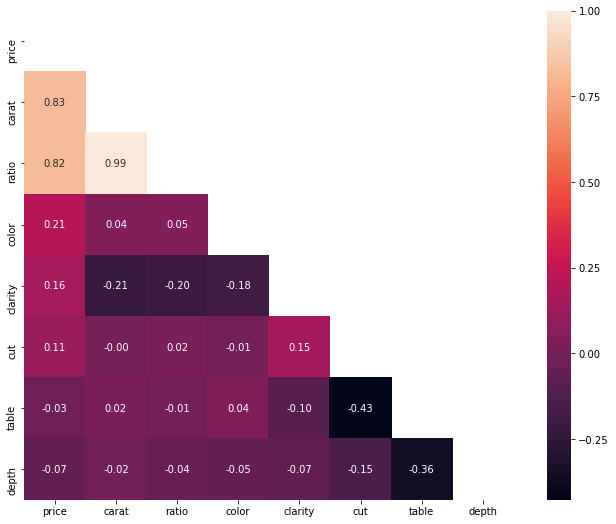

In [88]:
corrmat = diamondS.corr()
f, ax = plt.subplots(figsize=(12, 9))
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(diamondS[cols].values.T)

# Generate a mask for the upper triangle
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


hm = sns.heatmap(cm, vmax=1, mask=mask, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

##### According to the correlation matrix - price is highly correlated with the features:

- Carat of Diamond
- Ratio of Diamond

#### Conclusions:

* This makes sense, as we have shown earlier that the relationship between the carat and the price is straight, and how it is a influential factor on the price.
* Although the correlation matrix was done on the small diamonds group, the ratio still appears to be a significant factor in the price effect.
* In addition, we can see that as we saw in the matrices before, the effect of the color feature, then the brightness, and the small effect of the cut.





# Regression

First we'll start by Linear Regression.
We divide the dataset into testing and training dataset:

In [197]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [307]:
diamondR=diamond.copy()
diamondR.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,ratio
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75,51.917250


You can see that there are differences between the variables, we will narrow the differences by normalizing:

In [308]:
diamondR.ratio = (diamond.ratio-min(diamond.ratio))/(max(diamond.ratio)-min(diamond.ratio))
diamondR.carat = (diamond.carat-min(diamond.carat))/(max(diamond.carat)-min(diamond.carat))
diamondR.cut = (diamond.cut-min(diamond.cut))/(max(diamond.cut)-min(diamond.cut))
diamondR.color = (diamond.color-min(diamond.color))/(max(diamond.color)-min(diamond.color))
diamondR.clarity = (diamond.clarity-min(diamond.clarity))/(max(diamond.clarity)-min(diamond.clarity))
diamondR.depth = (diamond.depth-min(diamond.depth))/(max(diamond.depth)-min(diamond.depth))
diamondR.table = (diamond.table-min(diamond.table))/(max(diamond.table)-min(diamond.table))
diamondR.x = (diamond.x-min(diamond.x))/(max(diamond.x)-min(diamond.x))
diamondR.y = (diamond.y-min(diamond.y))/(max(diamond.y)-min(diamond.y))
diamondR.z = (diamond.z-min(diamond.z))/(max(diamond.z)-min(diamond.z))
diamondR.price = (diamond.price-min(diamond.price))/(max(diamond.price)-min(diamond.price))

In [306]:
diamondR.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z,ratio
count,53919.000000,53919.000000,53919.000000,53919.000000,53919.000000,53919.000000,53919.000000,53919.000000,53919.000000,53919.000000,53919.000000
mean,0.124257,0.726057,0.567666,0.435934,0.520821,0.278016,0.194888,0.285533,0.073041,0.080376,0.121618
std,0.098497,0.279147,0.283546,0.235285,0.039786,0.042963,0.215557,0.159684,0.039719,0.022853,0.094907
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.041580,0.500000,0.333333,0.285714,0.500000,0.250000,0.033681,0.139800,0.036984,0.059876,0.041499
50%,0.103950,0.750000,0.500000,0.428571,0.522222,0.269231,0.112180,0.281027,0.072191,0.080052,0.103040
75%,0.174636,1.000000,0.833333,0.571429,0.541667,0.307692,0.270125,0.400856,0.101707,0.096648,0.172457
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [302]:
Y = diamondR.price
X = diamondR.drop(['price'],axis=1)

In [304]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=0)

In [290]:
reg = LinearRegression()
reg.fit(xtrain,ytrain)
ypred = reg.predict(xtest)
acc_score = reg.score(xtest,ytest)
print('LINEAR REGRESSION:')
print('Accuracy Score is: {}'.format(acc_score))

LINEAR REGRESSION:
Accuracy Score is: 0.9122497015536942


In [291]:
from sklearn.metrics import mean_squared_error

In [292]:
print('Mean Squared Error:')
print(('Value : %.10f' % mean_squared_error(ytest,ypred)))

Mean Squared Error:
Value : 0.0041454642


As we can see the Mean squared error regression loss is low 

In [293]:
feature_importances = pd.DataFrame(reg.coef_,
                                   index = xtrain.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

,importance
ratio,1.695632
carat,1.258119
clarity,0.189180
color,0.104697
x,0.088865
cut,0.021784
depth,0.012192
table,-0.043591
y,-0.946811
z,-1.733972


### Linear regression setting can make the model extremely sensitive to noise in the data
#### So, we'll try Random Forest Regressor algorithem:

In [295]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

clf_rf = RandomForestRegressor()
clf_rf.fit(xtrain , ytrain)
accuracies = cross_val_score(estimator = clf_rf, X = xtrain, y = ytrain, cv = 8,verbose = 1)
ypred = clf_rf.predict(xtest)

print('Random Forest Regressor:')
print('Value : %.10f' % clf_rf.score(xtest, ytest))
#print(accuracies)

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   55.3s finished


Random Forest Regressor:
Value : 0.9813211759


In [296]:
feature_importances = pd.DataFrame(clf_rf.feature_importances_,
                                   index = xtrain.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

         importance
ratio      0.631733
y          0.218753
clarity    0.062238
carat      0.041590
color      0.032271
z          0.003864
x          0.003275
depth      0.002665
table      0.002096
cut        0.001514


We can see that carat feature received a low score, as opposed to the ratio and to its results in a linear regression.

The method by which the model is fit on the training data is very different for a linear regression model as compared to random forest model.

In random forest regressor, the variables with highest difference are considered most important, and ones with lower values are less important.

As we have seen, Carat and ratio have similar behavior. Therefore, in order to see the importance of carat, we will reduce the variables that belong to the size of the diamond such as: ratio, x, y, z, and see the result of carat and the prediction score.

In [298]:
del xtrain['ratio']
del xtest['ratio']
del xtrain['x']
del xtest['x']
del xtrain['y']
del xtest['y']
del xtrain['z']
del xtest['z']

In [299]:
clf_rf.fit(xtrain , ytrain)
accuracies = cross_val_score(estimator = clf_rf, X = xtrain, y = ytrain, cv = 8,verbose = 1)
ypred = clf_rf.predict(xtest)

print('Random Forest Regressor:')
print('Value : %.10f' % clf_rf.score(xtest, ytest))

feature_importances = pd.DataFrame(clf_rf.feature_importances_,
                                   index = xtrain.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   27.5s finished


Random Forest Regressor:
Value : 0.9810976737
         importance
carat      0.883766
clarity    0.067392
color      0.033799
depth      0.008061
table      0.004002
cut        0.002980


Carat is indeed an important factor of the price, and accuracy is still high.

## Results of regression:
* Linear regression : 91%
* Random Forest Regressor : 98%

## Conclusion

You can see a direct connection between the size of the diamond, its carat weight to the  price of the diamond.
We have seen the small effects of the various factors, each factor has a slight impact on the price of the diamond.
We think the results we received are indeed impressive, and reflect the diamond price determination just the way it is in the market.
There is still some things one can do here, stacking models or averaging models, Check model performance by diffrent Plots etc.. Will do it in future if possible.